# EXPLORATION 02

## 3. 와인 클래스 예측


### 1. Imort module

In [1]:
from sklearn.datasets import load_wine # 데이터 불러오기
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score # 정확도 확인
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier # DecisionTree 모델 정의
from sklearn.linear_model import SGDClassifier # SGDClassifier 모델 정의
from sklearn.linear_model import LogisticRegression # Logistic Regression 모델 정의
from sklearn.ensemble import RandomForestClassifier # RandomForest 모델 정의
from sklearn import svm # SVM 모델 정의
from sklearn.metrics import confusion_matrix 
import numpy as np # numpy 정의
import pandas as pd # 데이터프레임을 위한 판다스 정의
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data load

In [2]:
# 데이터 로드
wine = load_wine()
wine_data = wine.data
wine_target = wine.target
bcdf = pd.DataFrame(data=wine_data, columns=wine.feature_names) # 판다스 DataFrame 자료형 변환
# pd.set_option('display.max_columns', None) # 데이터 프레임 생략없이 출력

### 3.Data check

In [3]:
# 데이터 확인
print('분류 : ',wine.keys()) # 키
print('총 데이터 및 특징 갯수 : ',wine_data.shape) 
print('Lable : ',wine.target_names,'\n')  # 타겟(정답)에 이름
print('특징 이름 : ',wine.feature_names,'\n') # 각 특징에 설명

분류 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
총 데이터 및 특징 갯수 :  (178, 13)
Lable :  ['class_0' 'class_1' 'class_2'] 

특징 이름 :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 



- 와인 데이터는 178개로 각각 13개의 특성을 나타내고 있습니다.
- Lable 데이터에 경우 클래스 별로 구분되고 있습니다.

In [4]:
bcdf.columns
bcdf.head()       # 데이터 프레임 활용

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
bcdf.describe()   # 데이터 프레임으로 위 코드에 대한 통계

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
print('데이터 설명 : ',wine.DESCR,'\n') # 데이터에 설명

데이터 설명 :  .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:   

### 4. 데이터 분할

In [7]:
# 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(wine_data,
                                                 wine_target,
                                                 test_size=0.2,
                                                 random_state=13)
print('number of X_train:', len(x_train), 'number of X_test:', len(x_test))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

number of X_train: 142 number of X_test: 36
(142, 13) (142,)
(36, 13) (36,)


- 테스트,훈련 데이터 분할 및 분할 갯수 확인

### 5. 모델 정의

In [8]:
# 모델 정의
decision_tree = DecisionTreeClassifier(random_state=16)
sgd_model = SGDClassifier(random_state=16)
logistic_model = LogisticRegression(random_state=16,solver='liblinear',max_iter=30000)
random_forest = RandomForestClassifier(random_state=16)
svm_model = svm.SVC(random_state=16)

- 각 시드를 16으로 조정하여 결과값 고정
- solver : 최적화 문제에 사용하는 알고리즘 max_iter : 계산에 사용할 작업 수

### 6. 각 모델별 훈련 및 예측

In [11]:
wine_accuracy = {}

# 
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print('[Decision Tree Classifier]\n\n',classification_report(y_test,y_pred))
wine_accuracy['Decision Tree Classifier'] = accuracy_score(y_test,y_pred)

sgd_model.fit(x_train,y_train)
y_pred = sgd_model.predict(x_test)
print('\n\n[SGD Classifier]\n\n',classification_report(y_test,y_pred))
wine_accuracy['SGD Classifier'] = accuracy_score(y_test,y_pred)

logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)
print('\n\n[Logistic Regression Classifier]\n\n',classification_report(y_test,y_pred,labels=np.unique(y_pred))) # ,한 번 예측 될  경우 관심없음
wine_accuracy['Logistic Regression Classifier'] = accuracy_score(y_test,y_pred)

random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print('\n\n[Random Forest Classifier]\n\n',classification_report(y_test,y_pred))
wine_accuracy['Random Forest Classifier'] = accuracy_score(y_test,y_pred)

svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print('\n\n[SVM Classifier]\n\n',classification_report(y_test,y_pred))
wine_accuracy['SVM Classifier'] = accuracy_score(y_test,y_pred)


[Decision Tree Classifier]

               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.93      0.87      0.90        15
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



[SGD Classifier]

               precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.65      0.87      0.74        15
           2       0.00      0.00      0.00         9

    accuracy                           0.67        36
   macro avg       0.45      0.59      0.51        36
weighted avg       0.50      0.67      0.57        36



[Logistic Regression Classifier]

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      1.00      0.9

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
for i in wine_accuracy.items():
    print(f"{i[0]:<20} : {i[1]}")
    

Decision Tree Classifier : 0.9166666666666666
SGD Classifier       : 0.6666666666666666
Logistic Regression Classifier : 0.9722222222222222
Random Forest Classifier : 1.0
SVM Classifier       : 0.7777777777777778


- 단순히 정확도를 기준으로 보면 Random Forest Classifier 모델이 가장 높게 나왔다.
- 하지만 더 다양한 측정 기준을 사용해보자

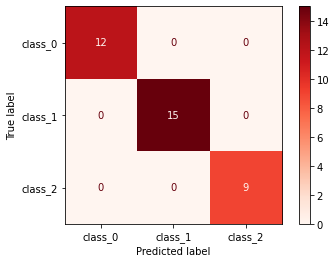

In [14]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(random_forest, x_test, y_test, values_format='d',display_labels=wine.target_names,cmap=plt.cm.Reds)

- Confusion matrix를 시각화 한 결과이다
    
    클래스 0~2까지 예측한 결과값으로 현재 데이터로 봤을때 class_1이 가장 높게 측정된다

## 7.프로젝트 정리

     와인 클래스 예측에 경우 라벨을 맞추는 과정이 중요한 것 같다. 손글씨와 같이 가장 중간값이 높게 측정되었다
    
     정확도면에서 다른 모델보다 우수했던 Random_Forest의 경우 정확도 말고도 다른 결과도 타 모델에 비해 우수한 성적이 나왔음으로
     와인 클래스 예측은 Random_Forest 모델을 5개의 모델중 추천한다.
     
     시각화와 전처리,성능평가에 관해 보다 많은것을 배울 수 있었고 많은것을 생각할 수 있게 만들던 파트였다. scikit-learn 데이터 덕분에
     좀 더 수월하게 모델들을 학습할 수 있었던 계기가 되었던것같다.